# TASK 2 
UNSUPERVISED LEARNING USING K MEANS ON IRIS DATASET



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
%matplotlib inline

D:\Python3\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
IRIS = datasets.load_iris()

Now converting the data in IRIS to a Data Frame 

In [8]:
my_df = pd.DataFrame(IRIS.data,columns = IRIS.feature_names)

### This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray


#### The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [10]:
my_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Firstly we need to know the optimum number of clusters that are required in order to have perfect clusters ,To accomplish this we need to use elbow method TO DETERMINE K

In [15]:
X = my_df.iloc[:,[0,1,2,3]].values

In [16]:
WCSS=[] #Within Clusters Sum Of Sqaures initialization

In [17]:
for i in range(1,15):
    kmeans = KMeans(n_clusters=i , init='k-means++',n_init=12,random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)  

### We will plot the WCSS in order to view the elbow curve

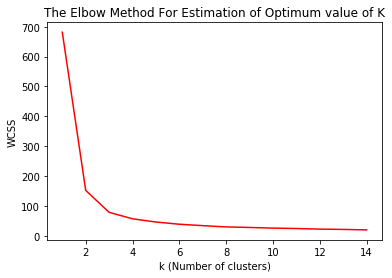

In [21]:
plt.plot(range(1, 15), WCSS,color='r')
plt.title('The Elbow Method For Estimation of Optimum value of K')
plt.xlabel('k (Number of clusters)')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### As seen in the visual plot above that for the value of K between 2 and 4 , The WCSS ie WITHIN CLUSTER SUM OF SQUARES converges gradually

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering. K-means is a simple unsupervised machine learning algorithm that groups data into a specified number (k) of clusters. Because the user must specify in advance what k to choose, the algorithm is somewhat naive – it assigns all members to k clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

### Here we conclude K=3 is the most optimal value of k

Moving on with k=3

Applying Kmeans on our dataset 

Initialize KMeans with these parameters, where the output parameter is called k_means.

In [22]:
k_means = KMeans(n_clusters=3,init='k-means++',n_init=15)

Now let's fit the KMeans model with the feature matrix we initialized above, X

In [23]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now we will obtain labels for the data in the K-Means Algorithm 

In [25]:
k_means_labels = k_means.labels_

In [32]:
k_means_labels #we can see that there are 3 unique labels 0,1,2 for the three different types of irises’ 
                                                                 #(Setosa, Versicolour, and Virginica) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Now obtaining cluster centers in the K-Means Algorithm

In [33]:
k_means_centers = k_means.cluster_centers_

In [34]:
k_means_centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Plotting K-Means Clustering

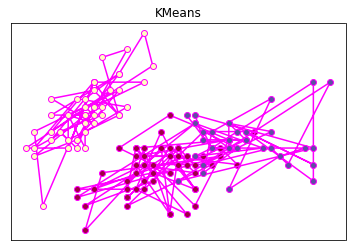

In [51]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-2, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means_centers)), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'magenta', markerfacecolor=col, marker='o')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'blue', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

